<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import SCORERS as sc
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

state = np.random.RandomState(12345)

In [3]:
def missing_value(df):
    missing_value = pd.DataFrame(columns=['NaN_part', 'empty_counts', 'unique_counts',\
                                          'min_value', 'max_value', 'dtypes', 'length'], index=df.columns)
    for i in df.columns: 
        missing_value['NaN_part'][i] = df[i].isnull().mean()
        missing_value['empty_counts'][i] = df[df[i] == ''][i].count()
        missing_value['unique_counts'][i] = len(df[i].unique())
        missing_value['min_value'][i] = df[i].min()
        missing_value['max_value'][i] = df[i].max()
        missing_value['dtypes'][i] = df[i].dtypes
        missing_value['length'][i] = len(df[i])

    return(missing_value)

In [4]:
data = pd.read_csv('datasets/insurance.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [8]:
value = missing_value(data)
value

,NaN_part,empty_counts,unique_counts,min_value,max_value,dtypes,length
Пол,0,0,2,0,1,int64,5000
Возраст,0,0,46,18,65,float64,5000
Зарплата,0,0,524,5300,79000,float64,5000
Члены семьи,0,0,7,0,6,int64,5000
Страховые выплаты,0,0,6,0,5,int64,5000


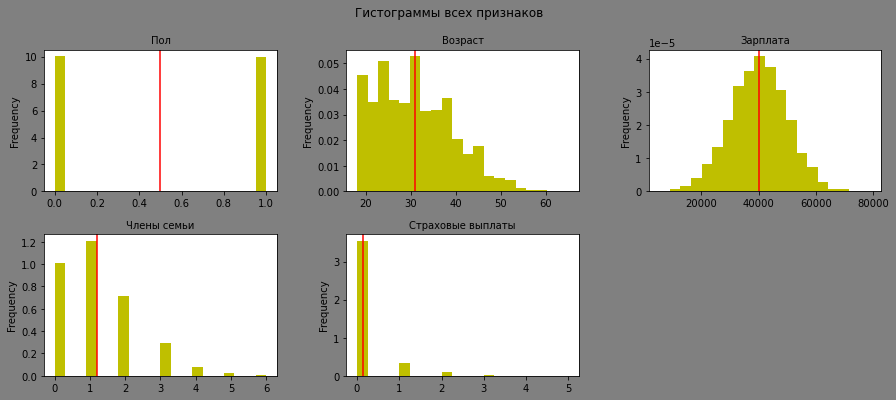

In [9]:
fig = plt.figure(figsize=(15,6), facecolor=('gray'))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Гистограммы всех признаков')

subplots = 1
for feature in data.columns:
    ax = fig.add_subplot(2, 3, subplots)
    data[feature].plot(kind='hist', bins=20, color='y', density=True, ax=ax)
    ax.axvline(x=data[feature].mean(), color='r')
    ax.set_title(data[feature].name, fontsize=10)
    subplots += 1
plt.show()

In [10]:
value = data[data["Страховые выплаты"] == 0]["Страховые выплаты"].count() * 100 / len(data)
print(f'Целевой признак "Страховые выплаты" имеет {value}% нулей')

Целевой признак "Страховые выплаты" имеет 88.72% нулей


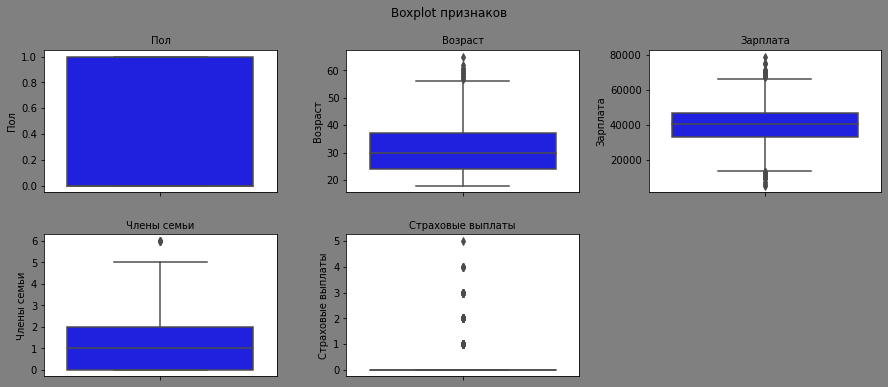

In [11]:
fig = plt.figure(figsize=(15,6), facecolor='gray')
fig.suptitle('Boxplot признаков')
fig.subplots_adjust(wspace=0.3, hspace=0.3)

subplots = 1
for feature in data.columns:
    ax = fig.add_subplot(2, 3, subplots)
    ax = sns.boxplot(y=data[feature], color='b')
    ax.set_title(data[feature].name, fontsize=10)
    subplots += 1
plt.show()

In [12]:
for feature in data.columns:
    shapiro_test = st.shapiro(data[feature].dropna())
    print(shapiro_test)

ShapiroResult(statistic=0.6366516351699829, pvalue=0.0)
ShapiroResult(statistic=0.9656656980514526, pvalue=6.375584546536505e-33)
ShapiroResult(statistic=0.9996758699417114, pvalue=0.6334040760993958)
ShapiroResult(statistic=0.8609768748283386, pvalue=0.0)
ShapiroResult(statistic=0.35772716999053955, pvalue=0.0)


Вывод:
- 5000 наблюдений (int and float)
- пропуски и аномалии отсутствуют
- нормальное распределение имеет только признак зарплата
- целевой признак сильно несбалансирован

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не изменится

**Обоснование:** 
Формулировка задачи: у меня есть формула обучения 
$$w = (X^TX)^{-1}X^Ty$$
и есть предсказания
$$ a = Xw$$
Необходимо доказать, что a' = a, где $$а' = XPw'$$
Подставлю в формулу обучения $XP$ вместо $X$, где $P$ - это любая обратимая матрица. Получаю:

$$w' = (((XP)^T)XP)^{-1}(XP)^Ty = (P^TX^TXP)^{-1}P^TX^TY = (P^T)^{-1}(X^TX)^{-1}P^{-1}P^TX^TY = (X^TX)^{-1}P^{-1}X^TY = P^{-1}w$$

Осталось подставить значение w' и w в формулу предсказания:
$$a' = XPw' = XPP^{-1}w = Xw = a$$

## Алгоритм преобразования

**Алгоритм**

- разбить данные на features and target
- промасштабировать признаки
- взять рандомную матрицу размера 4хn. Количество наблюдений (строк) обязательно должно быть 4, чтобы соответствовало размерности features. Это надо для будущего скалярного произведения.
- проверить ее на обратимость
- скалярно умножить рандомную матрицу на матрицу признаков
- посчитать метрику R2 на простейшей модели
- посчитать метрику R2 на линейной регрессии для матрицы признаков
- посчитать метрику R2 на модели линейной регрессии для рандомной матрици
- сравнить метрики. Они должны быть идентичны

**Обоснование**

при таком подходе можно оценить метрики и сравнить их между собою. Равенство метрик подтвердит теоретические выкладки.

## Проверка алгоритма

In [13]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
print(features.shape)
print(target.shape)

(5000, 4)
(5000,)


In [14]:
scaler = StandardScaler()
scaler.fit(features)
features_scaled = pd.DataFrame(scaler.transform(features), columns=features.columns)
features_scaled.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1.002002,1.190432,0.978235,-0.177957
1,-0.998002,1.782851,-0.193589,-0.177957
2,-0.998002,-0.231375,-1.910918,-1.094314
3,-0.998002,-1.179247,0.180182,0.738401
4,1.002002,-0.349859,-1.395720,-1.094314


In [15]:
matrix = np.random.normal(size=(4, 4))
matrix

array([[ 1.24735312,  0.2813827 ,  0.05264743,  0.59117516],
       [-0.64234073, -1.00779437, -0.03798428, -0.74349702],
       [-1.36557957,  1.75997463,  0.02490738,  1.32832508],
       [ 0.31323799,  0.02720892, -0.91322412,  1.749535  ]])

In [16]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-0.04382356, -0.74321549, -0.41883487,  0.01696323],
       [-1.80130052, -2.40264677, -0.51934116, -0.01807492],
       [ 4.26409791,  4.1590169 ,  1.7148715 , -0.97541284],
       [ 2.2616385 ,  2.34136002,  0.97819576,  0.05967742]])

In [17]:
features_matrix = features_scaled.values @ matrix
features_matrix

array([[-0.90641304,  0.7990624 ,  0.19441465,  0.69534905],
       [-2.18143999, -2.42312267,  0.03742987, -2.48402971],
       [ 1.17049142, -3.44058466,  0.90800424, -4.87082831],
       ...,
       [ 0.64997627, -0.02254122, -0.69271213,  0.85940839],
       [ 3.44505125,  0.11299373, -1.43627705,  3.30775147],
       [ 1.32452837,  0.7512357 ,  0.23027635,  0.63287209]])

In [18]:
# sorted(sc.keys())
dummy = DummyRegressor(strategy='median')
dummy.fit(features_scaled, target)
score = pd.DataFrame(cross_validate(dummy, features_scaled, target, cv=1000, scoring=('r2', 'neg_mean_squared_error')))

print(f'score R2={score.test_r2.mean()}, score MSE={abs(score.test_neg_mean_squared_error.mean())}')

score R2=0.3874718137254899, score MSE=0.23639999999999933


In [19]:
lr = LinearRegression()
lr.fit(features_scaled, target)
score = pd.DataFrame(cross_validate(lr, features_scaled, target, cv=1000, scoring=('r2', 'neg_mean_squared_error')))
print(f'score R2={score.test_r2.mean()}, score MSE={abs(score.test_neg_mean_squared_error.mean())}')

score R2=0.24161164853064013, score MSE=0.1237520615895728


In [20]:
lr = LinearRegression()
lr.fit(features_matrix, target)
score = pd.DataFrame(cross_validate(lr, features_matrix, target, cv=1000, scoring=('r2', 'neg_mean_squared_error'))).mean()
print(f'score R2={score.test_r2}, score MSE={abs(score.test_neg_mean_squared_error)}')

score R2=0.24161164853064032, score MSE=0.1237520615895728


In [29]:
%%time
best_model = None
best_score = 0.38
for depth in range(1, 10, 1):
    dtc = DecisionTreeClassifier(criterion='gini', max_depth = depth, min_samples_split=50, min_samples_leaf=50, random_state=state)
    dtc.fit(features_matrix, target)
    score = pd.DataFrame(cross_validate(dtc, features_matrix, target, cv=100, scoring=('r2', 'neg_mean_squared_error'))).mean()
    if score.test_r2 < best_score:
        best_score_mse = score.test_neg_mean_squared_error
        best_score_r2 = score.test_r2
        best_model = dtc
print(f'score R2={best_score_r2}, score MSE={abs(best_score_mse)}, best_model={best_model}')

score R2=0.23796838400550885, score MSE=0.16180000000000005, best_model=DecisionTreeClassifier(max_depth=9, min_samples_leaf=50, min_samples_split=50,
                       random_state=RandomState(MT19937) at 0x1995F774640)
Wall time: 15.4 s


In [42]:
%%time
best_model = None
best_score = 0.38
for depth in range(1, 10, 1):
    for est in range(1, 100, 10):
        rfc = RandomForestClassifier(max_depth = depth, n_estimators=est, random_state=state)
        rfc.fit(features_matrix, target)
        score = pd.DataFrame(cross_validate(rfc, features_matrix, target, cv=100, scoring=('r2', 'neg_mean_squared_error'))).mean()
        if score.test_r2 < best_score:
            best_score_mse = score.test_neg_mean_squared_error
            best_score_r2 = score.test_r2
            best_model = rfc
print(f'score R2={best_score_r2}, score MSE={abs(best_score_mse)}, best_model={best_model}')

score R2=0.2629380454742748, score MSE=0.15159999999999998, best_model=RandomForestClassifier(max_depth=9, n_estimators=1,
                       random_state=RandomState(MT19937) at 0x1995F774640)
Wall time: 2h 8min 39s


In [49]:
rfc = RandomForestClassifier(max_depth = 3, n_estimators=4, random_state=state)
rfc.fit(features_matrix, target)
score = pd.DataFrame(cross_validate(rfc, features_matrix, target, cv=100, scoring=('r2', 'neg_mean_squared_error'))).mean()

In [43]:
a = ['intercept'] + features.columns.tolist()
b = [lr.intercept_] + [i for i in lr.coef_]
coef = pd.DataFrame(zip(a, b), columns=['predictor', 'coef'])
coef.loc[:]

,predictor,coef
0,intercept,0.148000
1,Пол,-0.223708
2,Возраст,-0.730098
3,Зарплата,1.281884
4,Члены семьи,0.712064


In [44]:
def regression_coef(model, X, y):
    a = ['intercept'] + features.columns.tolist()
    b = [lr.intercept_] + [i for i in lr.coef_]
    coef = pd.DataFrame(zip(a, b), columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X), 1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = mean_squared_error(model.predict(X), y)
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1-st.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(lr, features, target) #что коэффициенты признаков не равны 0

,predictor,coef,pvalue
0,intercept,0.148000,0.999973
1,Пол,-0.223708,0.999880
2,Возраст,-0.730098,0.993405
3,Зарплата,1.281884,0.000000
4,Члены семьи,0.712064,0.999169


In [32]:
# plot_tree(best_model)

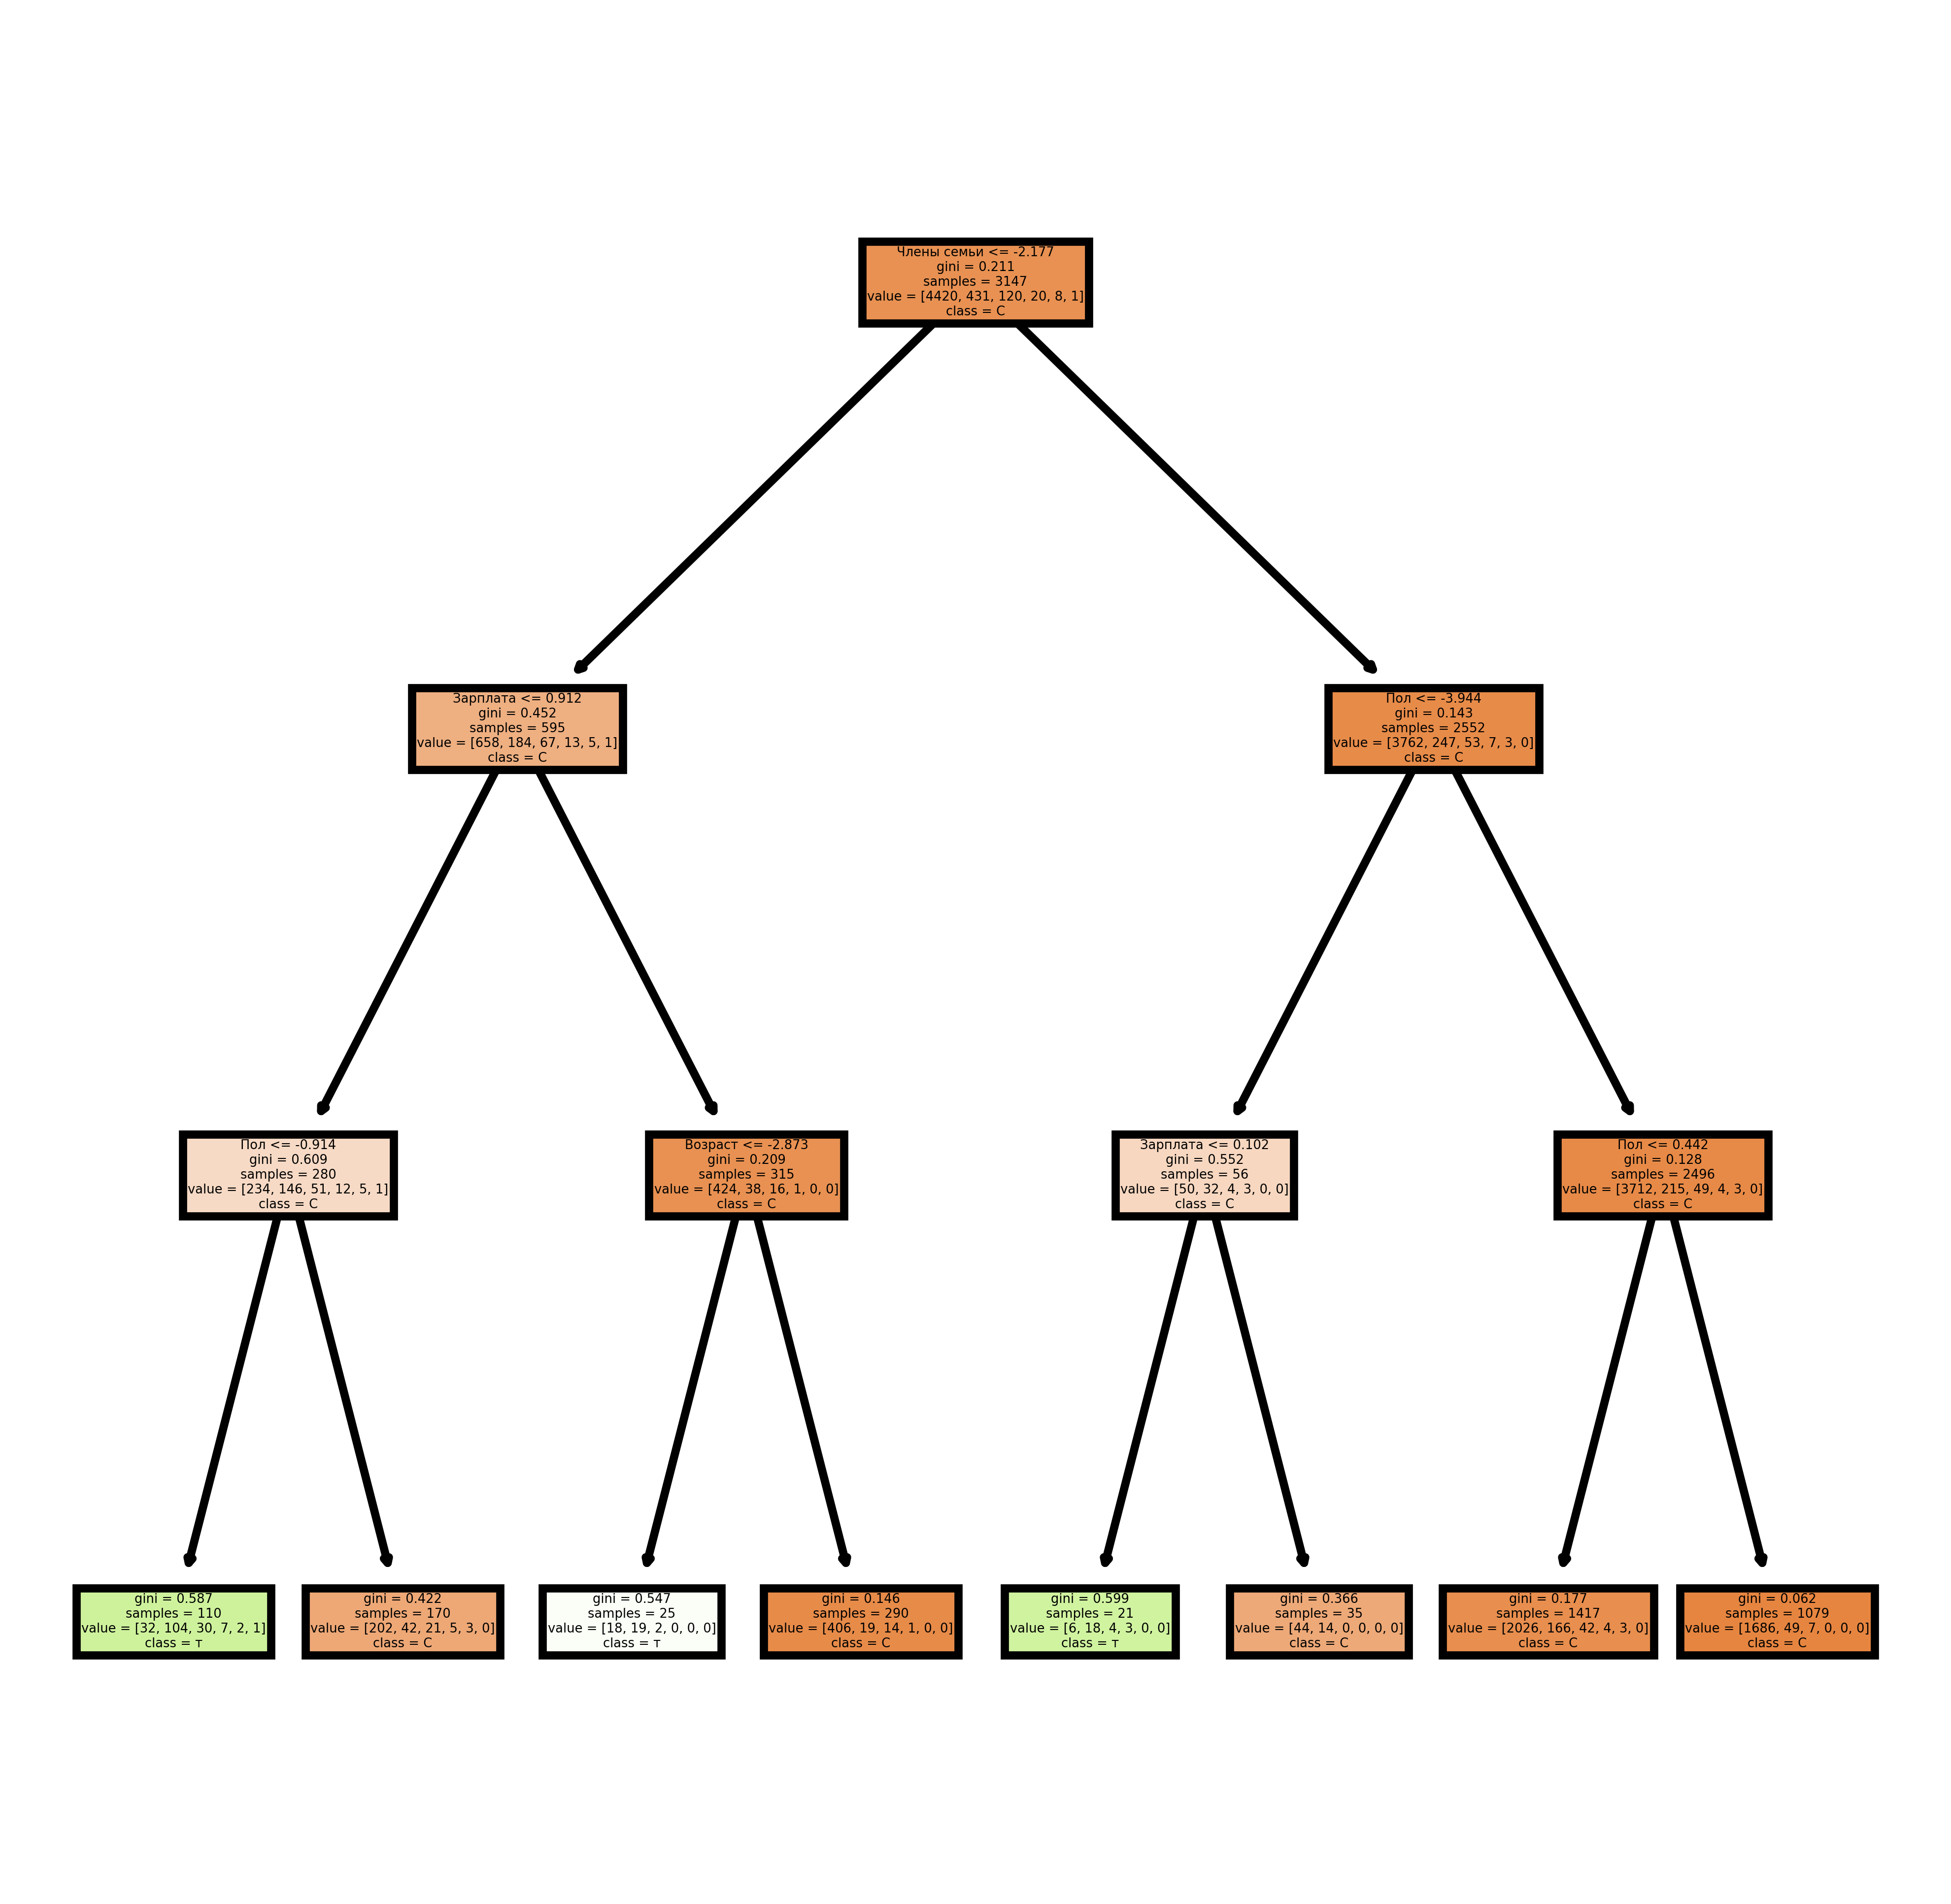

In [50]:
# fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
fn = features.columns
cn = target.name
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=1200)
plot_tree(rfc.estimators_[0], feature_names=fn, class_names=cn, filled=True)
fig.savefig('imagename.png')

In [54]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,2), dpi=3000)
for index in range(0, 4):
    plot_tree(rfc.estimators_[index],
                   feature_names = fn, 
                   class_names = cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [38]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(best_model, 
                out_file='tree.dot',
                class_names=None,
                label='all', 
                filled=True,
                impurity=True,
                node_ids=True,
                proportion=True,
                rotate=True)
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])
# Image("tree.png")

In [39]:
pd.DataFrame({'feature': features.columns, 'importance': dtc.feature_importances_}).sort_values('importance')

,feature,importance
3,Члены семьи,0.044327
2,Зарплата,0.192773
1,Возраст,0.318774
0,Пол,0.444126


### Вывод:
метрики сошлись, следовательно алгоритм работает и при этом не влияет на качество обучения модели